In [55]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [56]:
data_path = 'data'

data = pd.read_csv(os.path.join(data_path, 'ideology-data.csv',))
data.set_index(pd.to_datetime(data['Time']), drop=True, inplace=True)
data.drop(columns=['Time'], inplace=True)
data.head()

,Democrat,Republican
Time,,
2017-01-01,46.500000,41.000000
2017-02-01,45.800000,43.620000
2017-03-01,44.980000,41.120000
2017-04-01,43.375000,39.625000
2017-05-01,40.903704,35.196296


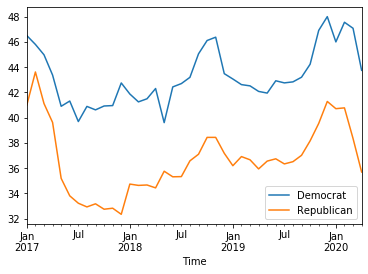

In [4]:
data.plot()
plt.show()

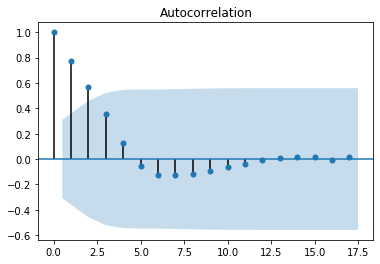

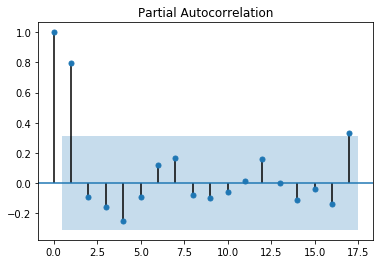

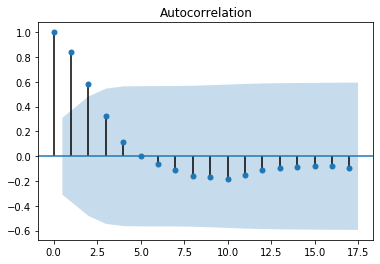

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


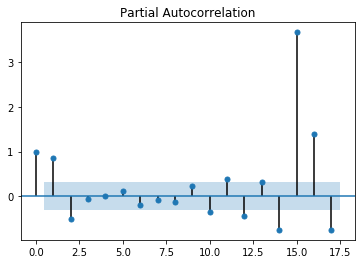

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Democrat'])
plt.show()
plot_pacf(data['Democrat'])
plt.show()

plot_acf(data['Republican'])
plt.show()
plot_pacf(data['Republican'])
plt.show()

In [7]:
year = ['2020'] * 8 + ['2021'] * 4
dom = ['20'] * 8 +  ['21'] * 4
index = []
for i in range(5,17):
    if i%12 == 0:
        month = 12
    else:
        month = i%12
    index.append(pd.to_datetime(f"{year[i-5]}-{month:02d}-{dom[i-5]}"))
    
index
test = pd.DataFrame(data=np.zeros((len(index), 2)), columns=data.columns)
test.index = pd.Series(index, name='Time')
test

,Democrat,Republican
Time,,
2020-05-20,0.0,0.0
2020-06-20,0.0,0.0
2020-07-20,0.0,0.0
2020-08-20,0.0,0.0
2020-09-20,0.0,0.0
2020-10-20,0.0,0.0
2020-11-20,0.0,0.0
2020-12-20,0.0,0.0
2021-01-21,0.0,0.0


In [8]:
naive_pred = pd.DataFrame(np.repeat([data.mean().values], len(test), axis=0), columns=test.columns, index=test.index)
naive_pred

,Democrat,Republican
Time,,
2020-05-20,43.302664,36.695458
2020-06-20,43.302664,36.695458
2020-07-20,43.302664,36.695458
2020-08-20,43.302664,36.695458
2020-09-20,43.302664,36.695458
2020-10-20,43.302664,36.695458
2020-11-20,43.302664,36.695458
2020-12-20,43.302664,36.695458
2021-01-21,43.302664,36.695458


In [19]:
y_hat = test.copy()

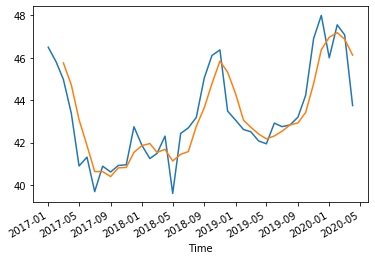

In [20]:
window_size=3
ax = plt.subplot(111)
plt.plot(data['Democrat'], label='Train')
data['Democrat'].rolling(window_size).mean().plot(ax=ax)
plt.show()
y_hat['naive_moving_average_dem'] = np.repeat(data['Democrat'].rolling(window_size).mean().iloc[-1], len(y_hat))

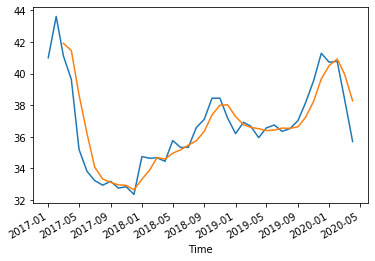

In [21]:
window_size=3
ax = plt.subplot(111)
plt.plot(data['Republican'], label='Train')
data['Republican'].rolling(window_size).mean().plot(ax=ax)
plt.show()
y_hat['naive_moving_average_rep'] = np.repeat(data['Republican'].rolling(window_size).mean().iloc[-1], len(y_hat))

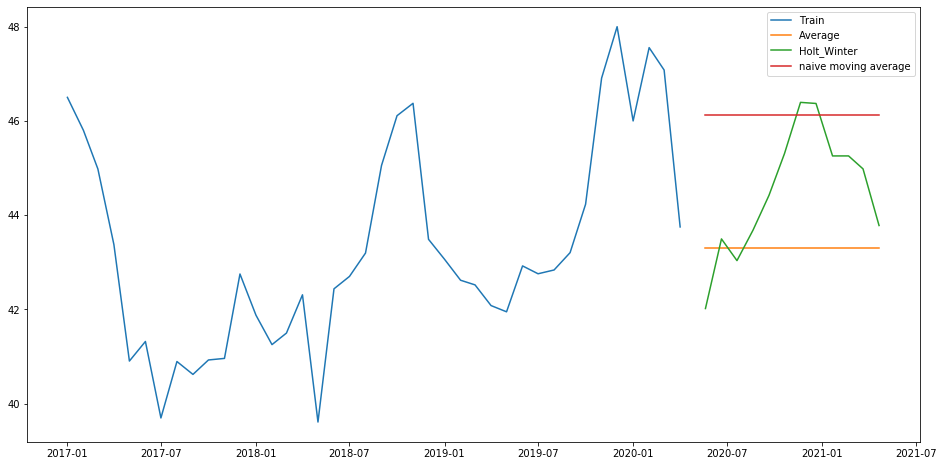

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_es = ExponentialSmoothing(np.asarray(data['Democrat']) ,seasonal_periods=12 ,trend='add', seasonal='multiplicative',).fit()
y_hat['Holt_Winter_Dem'] = fit_es.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(data['Democrat'], label='Train')
plt.plot(naive_pred['Democrat'], label='Average')
plt.plot(y_hat['Holt_Winter_Dem'], label='Holt_Winter')
plt.plot(y_hat['naive_moving_average_dem'], label='naive moving average')
plt.legend(loc='best')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


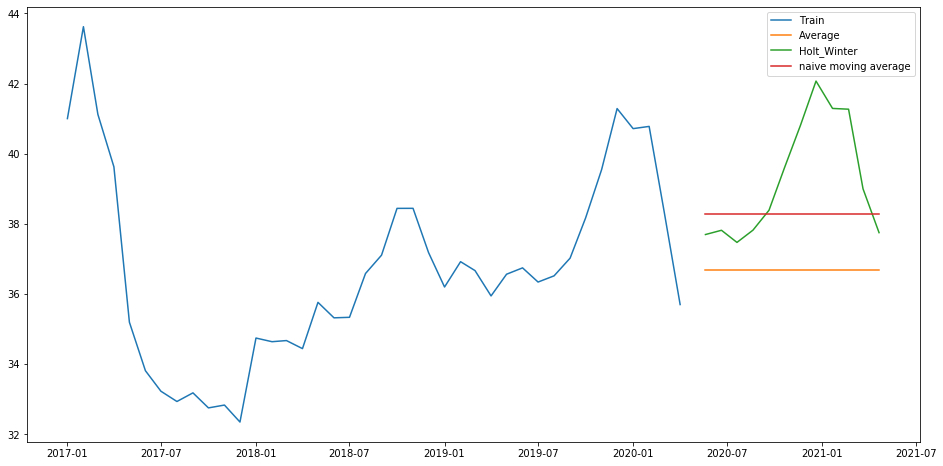

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_es = ExponentialSmoothing(np.asarray(data['Republican']) ,seasonal_periods=12,trend='add', seasonal='multiplicative',).fit()
y_hat['Holt_Winter_Rep'] = fit_es.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(data['Republican'], label='Train')
plt.plot(naive_pred['Republican'], label='Average')
plt.plot(y_hat['Holt_Winter_Rep'], label='Holt_Winter')
plt.plot(y_hat['naive_moving_average_rep'], label='naive moving average')
plt.legend(loc='best')
plt.show()

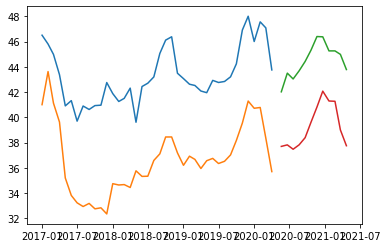

In [53]:
plt.plot(data[['Democrat', 'Republican']], label='Train')
plt.plot(y_hat['Holt_Winter_Dem'], label='Holt_Winter')
plt.plot(y_hat['Holt_Winter_Rep'], label='Holt_Winter')
plt.show()

In [54]:
sub_path = 'submission'
y_hat[['Holt_Winter_Dem', 'Holt_Winter_Rep']].to_csv(os.path.join(sub_path, 'stage1_idealogy.csv'))